# C-Dice Workshop: AI-Machine Learning Basics
# Date: 25/01/2023 

## Classification

### Dataset in Numpy Array 

In [2]:
pip install --upgrade scikit-learn

  Using cached scikit_learn-1.2.1-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Classification example 

from sklearn.linear_model \
import LogisticRegression as LRClassifier 
import numpy as np

# Data stored in a numpy array 
dataset = np.array([[1, 1, 0], 
                    [1, 3, 0], 
                    [2, 2, 1], 
                    [2, 3, 1]])
X=dataset[:,0:2]
y=dataset[:,2]

clf = LRClassifier()

# Fit the data
clf.fit(X, y) #train the model with X

# Predict the class of new data
newData=np.array([[1, 2]])
p_y=clf.predict(newData)
display(p_y)

array([0])

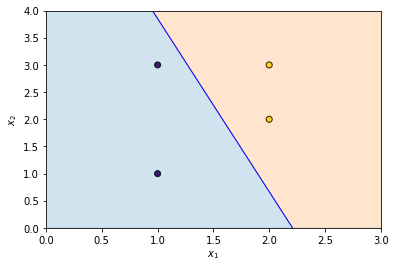

In [7]:
#Continue 
# Plotting data and classification with decision boundary of the linear model.
# The code below is not important. 
# We focus on the output 

import matplotlib
import matplotlib.pyplot as plt

######getting ready ############
# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
#range of the figure 
xmin, xmax = 0, 3
ymin, ymax = 0, 4

xd = np.array([xmin, xmax])
yd = m*xd + c

#####Plotting data########
# draw the line 
plt.plot(xd, yd,color="blue", linewidth=1)
# plot the data points 
plt.scatter(X[:,0],X[:,1],c=y, edgecolor="k")

#####Decoration############# 

# # shade the background 
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

# labels 
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

### Dataset in Pandas DataFrame  

In [10]:
#classification example

from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

data =np.array([[1, 1,0], 
              [1, 3, 0], 
              [2, 2, 1], 
              [2, 3, 1]])

df=pd.DataFrame(data,columns=["x1","x2","y"])

X=df[["x1","x2"]]

y=df["y"] 

#create the model 
clf = LogisticRegression()

# Fit the data
clf.fit(X, y)

# predict the class of new data
newData=pd.DataFrame([[1,2]],columns=["x1","x2"])
display(newData)
p_y=clf.predict(newData)

display(p_y)

,x1,x2
0,1,2


array([0])

## Regression 

### Dataset in Numpy Array 

In [11]:
#Regression Example  
from sklearn.linear_model import LinearRegression
import numpy as np
##data 
X = np.array([[1], 
              [2], 
              [3], 
              [4]])

y = np.array([6, 
              8, 
              9, 
              11])

# train a linear regressor
reg = LinearRegression()
reg.fit(X, y)

# predict a new sample
newData =np.array([[2.4]])
reg.predict(newData)

array([8.34])

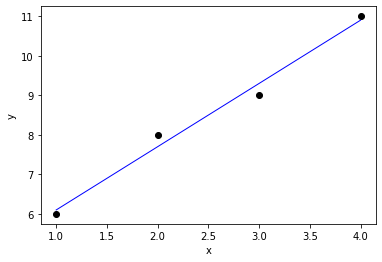

In [12]:
# continue
import matplotlib.pyplot as plt
plt.scatter(X, y, color="black")
predicted_y=reg.predict(np.array(X))
plt.ylabel("y")
plt.xlabel("x")
plt.plot(X,predicted_y, color="blue", linewidth=1)
plt.show()

### Dataset in Pandas DataFrame

In [13]:
# simple regression example 
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
##data 
data = np.array([[1,6], 
                [2,8], 
                [2,9], 
                [3,11]])

df=pd.DataFrame(data,columns=["X","y"])

X=df[["X"]]
y=df[["y"]]

# train a linear regressor
reg = LinearRegression().fit(X, y)

# predict 
newData=pd.DataFrame([2.4],columns=["X"])
reg.predict(newData)

array([[9.5]])

# Data Source

##  sklearn datasets

In [15]:
# Sklearn has several toy datasets 
# See below for the details of the datasets.  
# https://scikit-learn.org/stable/datasets/toy_dataset.html
from sklearn.datasets import load_iris # one of the datasets
from sklearn.linear_model import LogisticRegression

#getting data 
irisdata=load_iris()  

X=irisdata.data
y=irisdata.target 

# print (irisdata.feature_names)
# print (irisdata.target_names)

# Fit the data
clf = LogisticRegression()
clf.fit(X[:,[0,1]], y) #using only two columns of the table

# predict  the class of new data
newData=[[1,1]]

flowerTypeNo=clf.predict(newData)

print (irisdata.target_names[flowerTypeNo])


['setosa']


## Data files from URL address

In [16]:
#regression example 
from sklearn.linear_model import LinearRegression
import pandas as pd

movie_data_url="https://raw.githubusercontent.com/yash91sharma/IMDB-Movie-Dataset-Analysis/master/movie_metadata.csv"
df=pd.read_csv(movie_data_url)
# print (df.shape)
# print (df.columns)
#learning models don't like null values. it needs to be handled.
df.dropna(inplace=True) # delete the rows which contain null values.

X=df[["imdb_score"]]
y=df["gross"]

# train a linear regressor
reg = LinearRegression().fit(X, y)
# predict a new sample
newData=pd.DataFrame([3],columns=["imdb_score"])
#print(newData)
reg.predict(newData)


array([3073363.21746833])

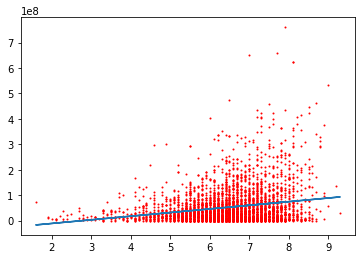

In [9]:
# visualise the prediction
import matplotlib.pyplot as plt
plt.scatter(X["imdb_score"], y, color="red",s=1)
predicted_y=reg.predict(X)
plt.plot(X["imdb_score"],predicted_y)
plt.show()

## Basic Model Evaluation


### Calculation of Model Accuracy

In [10]:
#ex1: very simple example 
from sklearn.metrics import accuracy_score 
y = [0, 1, 2, 3] 
y_pred = [0, 2, 1, 3] # 2 out of 4 prediction are correct. The accuracy is 2/4  
print(accuracy_score(y, y_pred))

0.5


In [17]:
#Ex2: Use of model accuracy
from sklearn.linear_model import LogisticRegression as LinearClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score 

#load iris  data
X,y=load_iris(return_X_y=True) 

#Fit the data to a logistic regression model.

# let's use only two columns of the datasets 
clf = LinearClassifier()
clf.fit(X[:,[0,1]], y)

# display the accuracy of the prediction 

y_pred=clf.predict(X[:,[0,1]])
print(accuracy_score(y, y_pred))
# .score will give the same result
#print (clf.score(X[:,[0,1]], y))

0.82


### Simulate use of the model

In [18]:
#Ex3: Use of train and test datasets   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LinearClassifier
from sklearn.datasets import load_iris

X,y=load_iris(return_X_y=True) 

# Split the data to create train and test datasets
X_train,X_test,y_train,y_test=train_test_split(
     X,y,
     test_size=0.3,
     random_state=0
     )

#Fit the data 
clf = LinearClassifier()
clf.fit(X_train[:,[0,1]], y_train)

# display the accuracy of the prediction 
print("Accurancy of")
## use all the dataset to develop a model 
print ("All the data:",clf.score(X[:,[0,1]], y))
## use 70% of the datasets 
print ("Train dataset:",clf.score(X_train[:,[0,1]], y_train))
## use 30% of the datasets 
print ("Test dataset:",clf.score(X_test[:,[0,1]], y_test))

Accurancy of
All the data: 0.8266666666666667
Train dataset: 0.8285714285714286
Test dataset: 0.8222222222222222


### Model Selection 

In [13]:
#svm vs lr with train and test datasets
from sklearn.linear_model import LogisticRegression as LinearClassifier
from sklearn.svm import SVC 
from sklearn.datasets import load_iris


X,y=load_iris(return_X_y=True) 
X_train,X_test,y_train,y_test=train_test_split(
     X,y,
     test_size=0.4, 
     random_state=0
     )

# Fit the data to a logistic regression model.
l_Clf =LinearClassifier(max_iter=1000,C=10,penalty="l2") 
l_Clf.fit(X_train, y_train)

# Fit the data to a Support Vector Classification model.
svmClf = SVC(kernel="linear")
svmClf.fit(X_train, y_train) 

# Display the accuracy 
print (l_Clf.score(X_test, y_test))
print (svmClf.score(X_test, y_test))

# Choose the best one and retrain model with all the data

svmClf.fit(X, y)

# predict  the class of a new sample
newData=np.array([[1, 1,2,2]])
svmClf.predict(newData)

0.9166666666666666
0.9666666666666667


array([1])

# Important links 



### Learn ML 
- https://colab.research.google.com/

- https://www.kaggle.com/

### Deep understanding of ML 
- https://www.youtube.com/user/joshstarmer

### Practicing your coding skills
- https://www.hackerrank.com/
- https://leetcode.com/

### E-Books 
- https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/
- https://jakevdp.github.io/PythonDataScienceHandbook/
- https://github.com/ageron/handson-ml3
